In [1]:
##### MIDTERM 1, PROBLEM 1 - ATANAS DELEVSKI #######

from matplotlib import pyplot as plt
import numpy as np
np.random.seed(1)


In [2]:
###### INITIAL IMAGE HANDLING ########
pre = plt.imread('barbara.png')
imglen = len(pre[0])
img = np.zeros((imglen, imglen))
for i in range(imglen):
    for j in range(imglen):                 
        img[i][j] = int(pre[i][j]*255)      # increasing values to [0,255]
# plt.imshow(img, cmap='Greys_r')
######################################


In [3]:
######### DECLARING VARIABLES ##########
d = 4
K = 8
num_epochs = 10
learning_rate = 0.25
######################################


In [4]:
#### CREATING THE "A" MATRIX (TRAIN SET)  & REVERSAL FUNCTION ######
n = int(imglen/d)
A = np.zeros((n, n, d, d))
k_index = 0
for k in range(0, n):
    l_index = 0
    for l in range(0, n):
        A[k][l] = img[k_index:k_index+d, l_index:l_index+d]
        l_index += d
    k_index += d

def reverse(matrix):
    size = len(matrix[0])
    B = np.zeros((size*d, size*d))
    k_index = 0
    for k in range(0, n):
        l_index = 0
        for l in range(0, n):
            B[k_index:k_index+d, l_index:l_index+d] = matrix[k][l]
            l_index += d
        k_index += d
    return B
################################################

In [5]:
######## CLASS & FUNCTIONS ############
class Competitive_Learning_Network(object):

    def __init__(self, num_of_neurons, neuron_size):
        self.num_of_neurons = num_of_neurons
        self.neuron_size = neuron_size
        self.neuron_weights = 255 * np.random.rand(num_of_neurons, neuron_size, neuron_size)

    def train(self, train_set, eta, num_of_epochs):
        self.num_of_epochs = num_of_epochs
        self.rms_values = []
        winners = np.zeros(K).astype(int)
        for epoch in range(self.num_of_epochs):
            # print(f"Starting Epoch #{epoch+1}")
            for i in range(n):
                for j in range(n):
                    values = []
                    for k in range(K):
                        temp = train_set[i][j]-self.neuron_weights[k]
                        value = sum(sum((temp)*(temp)))
                        values.append(value)
                    index = values.index(min(values))
                    winners[index] = 1
                    self.neuron_weights[index] = (1-eta)*self.neuron_weights[index] + eta*train_set[i][j]
            for i in range(K):
                if winners[i] != 1:
                    # print(f"Neuron {i} never won, reinitializing..")
                    self.neuron_weights[i] = train_set[0][0]
            # print(f"Ending Epoch #{epoch+1}")
            rms, a_prime_reversed = self.test(train_set)
            self.rms_values.append(rms)
            print(f"RMS after epoch #{epoch+1}: {rms}")
        plt.imshow(a_prime_reversed, cmap="Greys_r")
        # print(f"The Resutling RMS values for each epoch are: {self.rms_values}")

    def test(self, train_set):
        A_prime = np.zeros((n, n, d, d))
        rms = 0
        for i in range(n):
            for j in range(n):
                values = []
                for k in range(K):
                    temp = train_set[i][j]-self.neuron_weights[k]
                    value = sum(sum((temp)*(temp)))
                    values.append(value)
                index = values.index(min(values))
                A_prime[i][j] = self.neuron_weights[index]
        a_prime_reversed = reverse(A_prime)
        train_set_reversed = reverse(train_set)
        temp = a_prime_reversed-train_set_reversed
        rms = (1/512)*np.sqrt(sum(sum((temp)*temp)))
        return rms, a_prime_reversed
#################################################
    

RMS after epoch #0: 25.06930826003663
RMS after epoch #1: 26.55633092307601
RMS after epoch #2: 26.55633092307601
RMS after epoch #3: 26.55633092307601
RMS after epoch #4: 26.55633092307601
RMS after epoch #5: 26.55633092307601
RMS after epoch #6: 26.55633092307601
RMS after epoch #7: 26.55633092307601
RMS after epoch #8: 26.55633092307601
RMS after epoch #9: 26.55633092307601


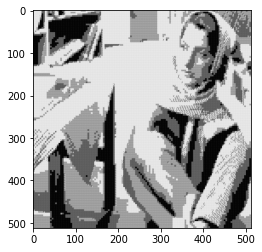

In [6]:
########### USAGE ################
network = Competitive_Learning_Network(K, d)
network.train(A, learning_rate, num_epochs) 
##################################

In [7]:
######### RMS/EPOCH GRAPH #############
# epochs = np.arange(1, network.num_of_epochs+1)
# plt.plot(epochs, network.rms_values)
# plt.xlabel('Epochs')
# plt.xticks(np.arange(1, network.num_of_epochs+1, step=1))
# plt.ylabel('RMS')
# plt.show()
#######################################